In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [3]:
def f(y, t):
  return y

T = np.linspace(0,2,1000)

In [4]:
sol = odeint(f, y0 = 1, t=T)

In [5]:
sol.T[0]

array([1.        , 1.00200401, 1.00401203, 1.00602408, 1.00804016,
       1.01006028, 1.01208444, 1.01411266, 1.01614495, 1.01818131,
       1.02022174, 1.02226627, 1.02431489, 1.02636763, 1.02842447,
       1.03048544, 1.03255055, 1.03461978, 1.03669317, 1.03877071,
       1.04085242, 1.0429383 , 1.04502835, 1.0471226 , 1.04922104,
       1.05132369, 1.05343055, 1.05554163, 1.05765694, 1.0597765 ,
       1.0619003 , 1.06402836, 1.06616068, 1.06829727, 1.07043815,
       1.07258332, 1.07473278, 1.07688656, 1.07904464, 1.08120706,
       1.08337381, 1.0855449 , 1.08772034, 1.08990014, 1.09208431,
       1.09427285, 1.09646578, 1.09866311, 1.10086484, 1.10307098,
       1.10528154, 1.10749653, 1.10971596, 1.11193984, 1.11416818,
       1.11640098, 1.11863825, 1.12088001, 1.12312627, 1.12537702,
       1.12763228, 1.12989206, 1.13215638, 1.13442523, 1.13669862,
       1.13897657, 1.14125909, 1.14354618, 1.14583786, 1.14813412,
       1.15043499, 1.15274047, 1.15505057, 1.1573653 , 1.15968

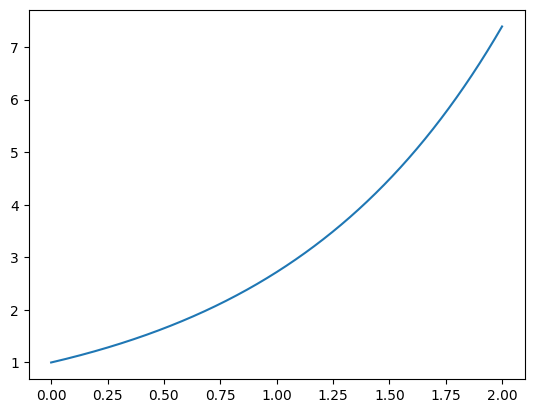

In [6]:
plt.plot(T, sol.T[0])
plt.show()

In [7]:
eps = 0.01
alpha = -0.5
A = np.array([[0,-1,1+alpha,1+alpha], [1+alpha, 0, -1, -1], [-1,1+alpha,0,0], [-1-eps, 1+alpha-eps, 0-eps, 0-eps]])
B = np.array([[0,-1,1+alpha], [1+alpha, 0, -1], [-1,1+alpha,0]])

In [8]:
def replicator(x, t):
  payoffs = A@x.T
  mean_payoff = x@payoffs
  return np.array([x[i]*(payoffs[i]-mean_payoff) for i in range(len(x))])

In [9]:
x0 = np.array([0.1, 0.1, 0.4, 0.4])

In [10]:
T = np.linspace(0,50,5000)
sol = odeint(replicator, y0 = x0, t=T)

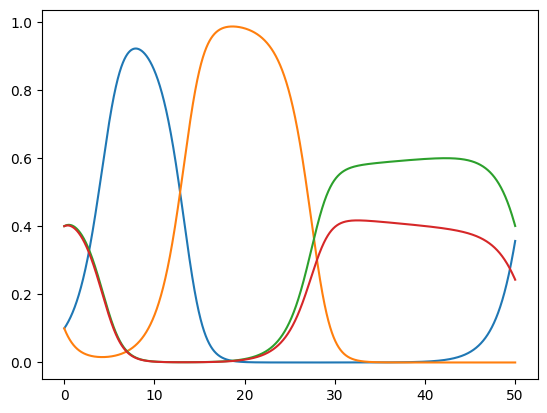

In [11]:
for i in range(len(x0)):
  plt.plot(T, sol.T[i])
plt.show()

In [12]:
def pos(x):
  return x*(x>0)

In [13]:
def smith(x, t):
  payoffs = A@x.T
  der = np.zeros(len(x))
  for i in range(len(x)):
    for j in range(len(x)):
      der[i] += x[j]*pos(payoffs[i]-payoffs[j])-x[i]*pos(payoffs[j]-payoffs[i])
  return der

In [14]:
x0 = np.array([1, 0, 0, 0])

In [15]:
T = np.linspace(0,200,5000)
sol = odeint(smith, y0 = x0, t=T)

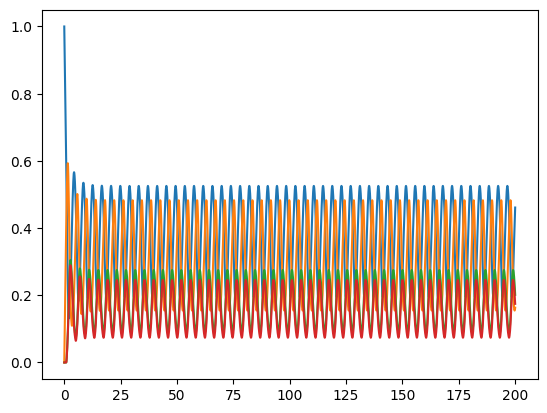

In [16]:
for i in range(len(x0)):
  plt.plot(T, sol.T[i])
plt.show()

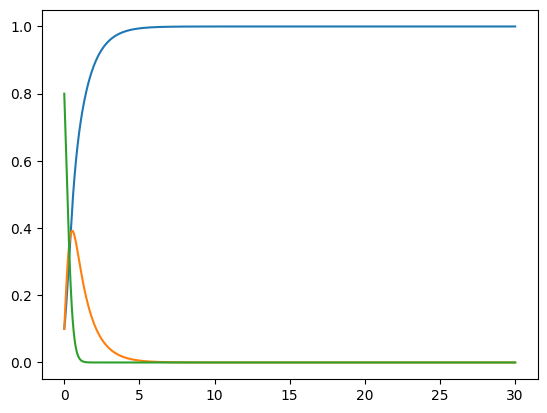

In [34]:
A = np.array([[4,3,0], [3,2,1], [0,1,0]])
x0 = np.array([0.1,0.1,0.8])
T = np.linspace(0,30,5000)
sol = odeint(smith, y0=x0,t=T)
for i in range(len(x0)):
  plt.plot(T, sol.T[i])
plt.show()

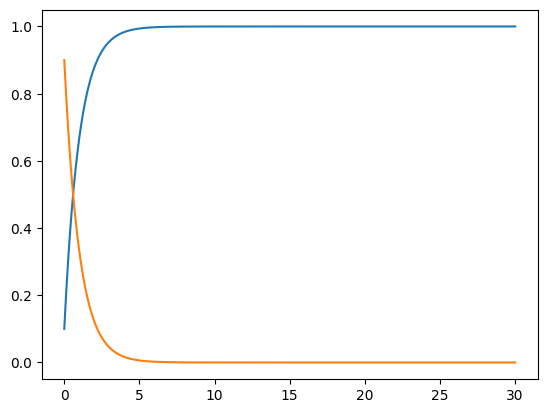

In [18]:
A = np.array([[2,1], [1,0]])
x0 = np.array([0.1,0.9])
T = np.linspace(0,30,5000)
sol = odeint(smith, y0=x0,t=T)
for i in range(len(x0)):
  plt.plot(T, sol.T[i])
plt.show()

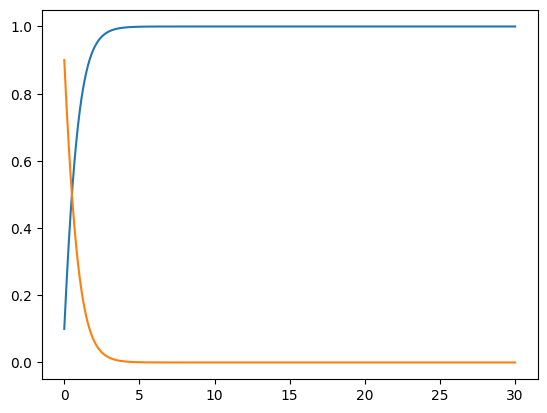

In [19]:
A = np.array([[2,1], [0.5,0]])
x0 = np.array([0.1,0.9])
T = np.linspace(0,30,5000)
sol = odeint(smith, y0=x0,t=T)
for i in range(len(x0)):
  plt.plot(T, sol.T[i])
plt.show()

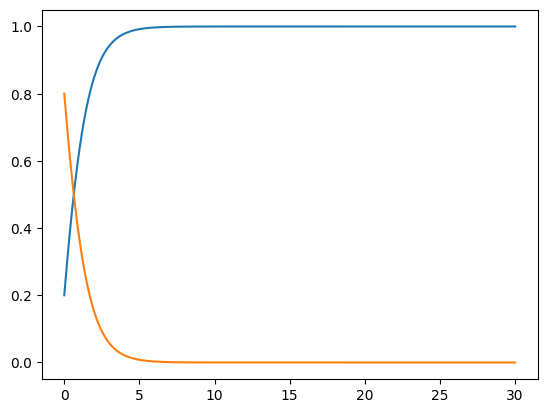

In [20]:
A = np.array([[1,0.5], [0,-0.1]])
x0 = np.array([0.2,0.8])
T = np.linspace(0,30,5000)
sol = odeint(smith, y0=x0,t=T)
for i in range(len(x0)):
  plt.plot(T, sol.T[i])
plt.show()

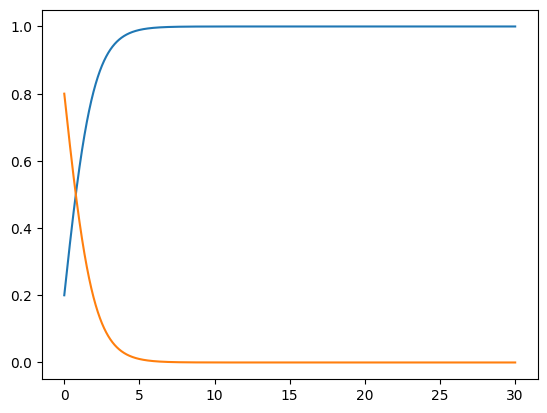

In [31]:
A = np.array([[1,0.4], [0,0]])
x0 = np.array([0.2,0.8])
T = np.linspace(0,30,5000)
sol = odeint(smith, y0=x0,t=T)
for i in range(len(x0)):
  plt.plot(T, sol.T[i])
plt.show()

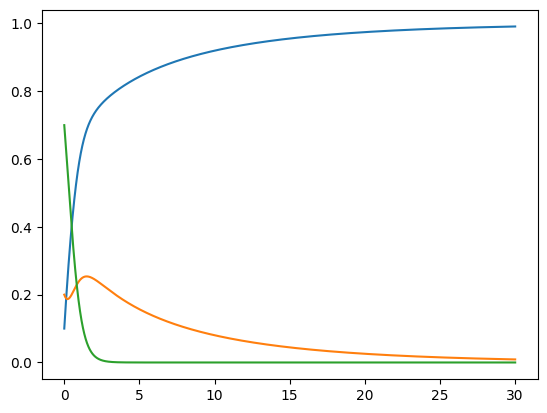

In [32]:
A = np.array([[2,1.9,1], [1.9,1.5,0], [1,0,0.5]])
x0 = np.array([0.1,0.2,0.7])
T = np.linspace(0,30,5000)
sol = odeint(smith, y0=x0,t=T)
for i in range(len(x0)):
  plt.plot(T, sol.T[i])
plt.show()

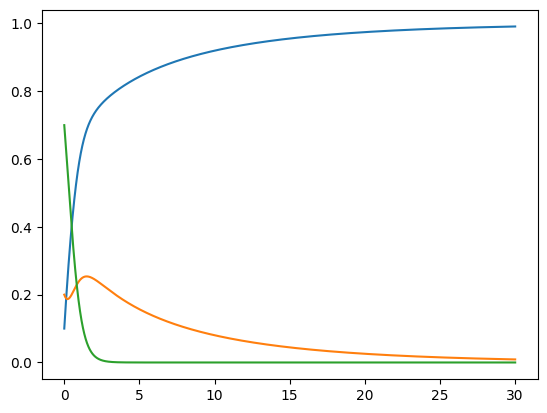

0.008996381059676406


In [33]:
A = np.array([[2,1.9,1], [1.9,1.5,0], [1,0,0.5]])
x0 = np.array([0.1,0.2,0.7])
T = np.linspace(0,30,5000)
sol = odeint(smith, y0=x0,t=T)
for i in range(len(x0)):
  plt.plot(T, sol.T[i])
plt.show()
print(sol.T[1][-1])

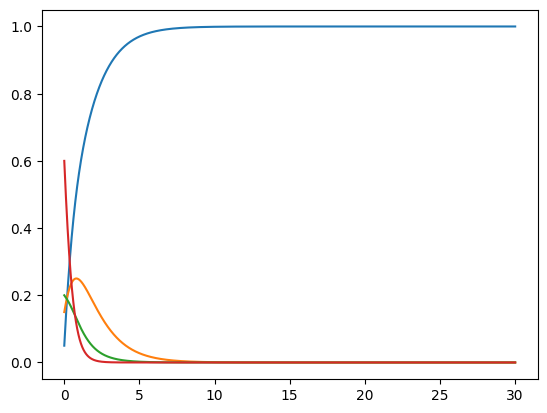

In [38]:
A = np.array([[2,2.1,1,1.9], [1.3,2,0.8,1.2], [1.2,1,0.9,1], [0.8, 0.5, 0.5, 0.9]])
x0 = np.array([0.05,0.15,0.2,0.6])
T = np.linspace(0,30,5000)
sol = odeint(smith, y0=x0,t=T)
for i in range(len(x0)):
  plt.plot(T, sol.T[i])
plt.show()

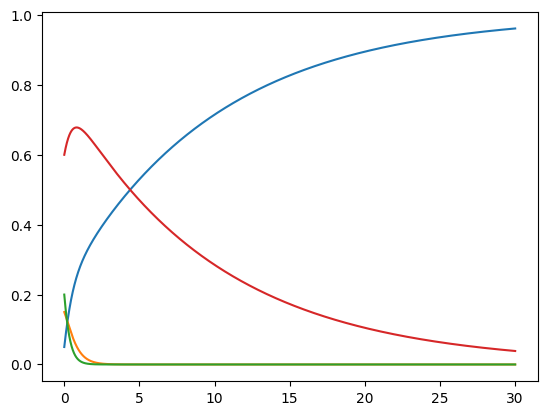

In [39]:
A = np.array([[2,1.5,1.1,1.9], [1,1.4,0.9,0.9], [0.9,0.6,1,0.4], [1.9, 1.4, 1, 1.8]])
x0 = np.array([0.05,0.15,0.2,0.6])
T = np.linspace(0,30,5000)
sol = odeint(smith, y0=x0,t=T)
for i in range(len(x0)):
  plt.plot(T, sol.T[i])
plt.show()